In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# List for holding lat_lngs and cities from citipy
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
city_count = len(cities)
city_count

634

In [4]:
#Gather weather data from openweathermap api and fill the appropriate lists
weatherCities = []
lat = []
lon = []
temp = []
hum = []
cloud = []
wspeed = []
country = []
edate = []

#Set up the url information
weather_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{weather_url}appid={weather_api_key}&units={units}&q="

# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        weatherCities.append(response["name"])
        country.append(response["sys"]["country"])
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        temp.append(response["main"]["temp_max"]) #the starter code refers to "Max Temp", not "Temp"
        hum.append(response["main"]["humidity"])
        cloud.append(response["clouds"]["all"])
        wspeed.append(response["wind"]["speed"])
        edate.append(response["dt"])
        
        index = cities.index(city)
        print(f"Processing record {index + 1} of {city_count} | {city}") 
        
    except (KeyError, IndexError): 
        print(f"City {city} not found. Skipping City.")
        pass

Processing record 1 of 634 | atuona
Processing record 2 of 634 | barrow
Processing record 3 of 634 | kavieng
Processing record 4 of 634 | punta arenas
Processing record 5 of 634 | khatanga
Processing record 6 of 634 | dalnerechensk
Processing record 7 of 634 | bethel
Processing record 8 of 634 | mahibadhoo
Processing record 9 of 634 | labrea
Processing record 10 of 634 | waingapu
Processing record 11 of 634 | vaini
Processing record 12 of 634 | businga
Processing record 13 of 634 | bredasdorp
Processing record 14 of 634 | inhambane
Processing record 15 of 634 | wad rawah
Processing record 16 of 634 | kabompo
Processing record 17 of 634 | saint george
Processing record 18 of 634 | yellowknife
Processing record 19 of 634 | jalu
Processing record 20 of 634 | port alfred
Processing record 21 of 634 | rikitea
Processing record 22 of 634 | geraldton
Processing record 23 of 634 | nikolskoye
Processing record 24 of 634 | nokaneng
Processing record 25 of 634 | busselton
Processing record 26 of 

Processing record 209 of 634 | taoudenni
Processing record 210 of 634 | marica
Processing record 211 of 634 | ancud
Processing record 212 of 634 | ondjiva
Processing record 213 of 634 | bijar
Processing record 214 of 634 | new norfolk
Processing record 215 of 634 | roma
Processing record 216 of 634 | norwich
Processing record 217 of 634 | opuwo
Processing record 218 of 634 | shingu
Processing record 219 of 634 | maniitsoq
Processing record 220 of 634 | hithadhoo
Processing record 221 of 634 | viedma
Processing record 222 of 634 | leninskoye
Processing record 223 of 634 | xuanhua
Processing record 224 of 634 | steinau
Processing record 225 of 634 | zacualtipan
Processing record 226 of 634 | kruisfontein
City katsiveli not found. Skipping City.
Processing record 228 of 634 | bilibino
Processing record 229 of 634 | sur
Processing record 230 of 634 | karratha
Processing record 231 of 634 | umea
Processing record 232 of 634 | adrar
Processing record 233 of 634 | hovd
Processing record 234 o

Processing record 413 of 634 | mahanje
Processing record 414 of 634 | saurimo
Processing record 415 of 634 | hyvinkaa
Processing record 416 of 634 | balsas
City marcona not found. Skipping City.
City bolungarvik not found. Skipping City.
Processing record 419 of 634 | katobu
Processing record 420 of 634 | saint-georges
City vaitupu not found. Skipping City.
Processing record 422 of 634 | srednekolymsk
Processing record 423 of 634 | egvekinot
Processing record 424 of 634 | voh
Processing record 425 of 634 | namibe
Processing record 426 of 634 | weyburn
Processing record 427 of 634 | victor harbor
Processing record 428 of 634 | matara
Processing record 429 of 634 | honningsvag
Processing record 430 of 634 | norman wells
Processing record 431 of 634 | grasse
Processing record 432 of 634 | grand gaube
City galiwinku not found. Skipping City.
Processing record 434 of 634 | esperance
City umzimvubu not found. Skipping City.
Processing record 436 of 634 | kaeo
Processing record 437 of 634 | m

Processing record 617 of 634 | albal
Processing record 618 of 634 | saravan
Processing record 619 of 634 | waipawa
Processing record 620 of 634 | omboue
Processing record 621 of 634 | santa maria
Processing record 622 of 634 | konevo
Processing record 623 of 634 | nicolas bravo
Processing record 624 of 634 | sambava
Processing record 625 of 634 | joshimath
Processing record 626 of 634 | eyl
Processing record 627 of 634 | sinnamary
Processing record 628 of 634 | tiznit
Processing record 629 of 634 | kolyubakino
Processing record 630 of 634 | bend
Processing record 631 of 634 | ciudad bolivar
Processing record 632 of 634 | porosozero
Processing record 633 of 634 | thinadhoo
Processing record 634 of 634 | noumea


In [5]:
#Create the dictionary of weather information for each city, and then convert to data frame and display    
weather_dict = {
    "City": weatherCities,
    "Country": country,
    "Latitude": lat,
    "Longitude": lon,
    "Max Temp (F)": temp,
    "Humidity (%)": hum,
    "Cloudiness (%)": cloud,
    "Wind Speed (mph)": wspeed,
    "Date": edate
}
#Save the city weather data as a data frame
weather_data = pd.DataFrame(weather_dict)

In [22]:
#Clean the data frame by removing any entries with humidity levels over 100%
weather_data_cl = weather_data[weather_data["Humidity (%)"] <= 100]
weather_data_cl.index.name = "City ID"

#Store the first date to label all the plots
start_time = weather_data_cl["Date"].iloc[0]
date = time.strftime('%m-%d-%Y', time.localtime(start_time))

#Convert epoch time into CST
weather_data_cl["Date"] = pd.to_datetime(weather_data_cl["Date"], unit='s', utc=True).dt.tz_convert('US/Central')

#Save the city weather data as a csv
weather_data_cl.to_csv("output_data/cities.csv", sep=',', encoding='utf-8')

#Display the cleaned and formatted data frame
weather_data_cl.head()

,City,Country,Latitude,Longitude,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Date
City ID,,,,,,,,,
0,Atuona,PF,-9.8000,-139.0333,78.55,75,3,18.66,2022-02-07 13:03:52-06:00
1,Barrow,US,71.2906,-156.7887,-25.58,68,0,8.05,2022-02-07 13:03:52-06:00
2,Kavieng,PG,-2.5744,150.7967,81.64,77,100,7.63,2022-02-07 13:03:52-06:00
3,Punta Arenas,CL,-53.1500,-70.9167,60.82,93,100,6.91,2022-02-07 13:03:53-06:00
4,Khatanga,RU,71.9667,102.5000,-23.10,99,99,8.90,2022-02-07 13:03:53-06:00


In [7]:
#Define a function that will create a scatter plot and save it
def scattered(xlabel, ylabel, lat_range, date, savename):
    plt.figure()
    plt.scatter(weather_data_cl[xlabel], weather_data_cl[ylabel], marker = "o", facecolors="skyblue", edgecolors="black")
    plt.grid()
    plt.xlabel(xlabel)
    plt.xlim(lat_range[0], lat_range[1])
    plt.ylabel(ylabel)
    plt.title(f"{ylabel} vs {xlabel} ({date})")
    
    #Save the figure
    plt.savefig("output_data/"+ savename)
    
    #Display the figure
    plt.show()    

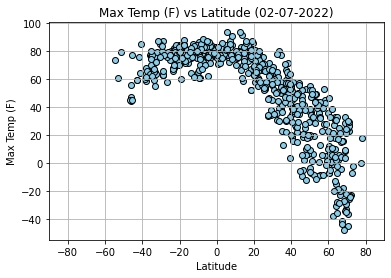

In [8]:
# Temperature (F) vs. Latitude

#Define plot specific information
xlabel = "Latitude"
ylabel = "Max Temp (F)"
savename = "MaxTvsLat"

#Call on the user-defined scattered function
scattered(xlabel, ylabel, lat_range, date, savename)

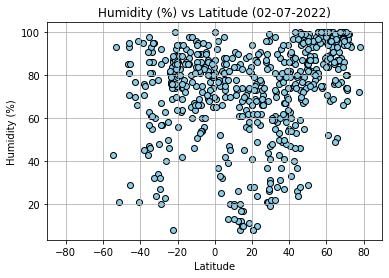

In [9]:
# Humidity (%) vs. Latitude

#Define plot specific information
xlabel = "Latitude"
ylabel = "Humidity (%)"
savename = "HumVsLat"

#Call on the user-defined scattered function
scattered(xlabel, ylabel, lat_range, date, savename)

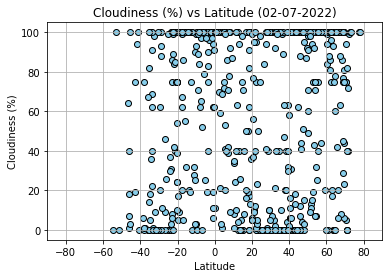

In [10]:
# Cloudiness (%) vs. Latitude

#Define plot specific information
xlabel = "Latitude"
ylabel = "Cloudiness (%)"
savename = "CloudVsLat"

#Call on the user-defined scattered function
scattered(xlabel, ylabel, lat_range, date, savename)

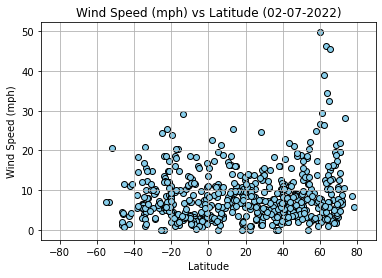

In [11]:
# Wind Speed (mph) vs. Latitude

#Define plot specific information
xlabel = "Latitude"
ylabel = "Wind Speed (mph)"
savename = "WSpdVsLat"

#Call on the user-defined scattered function
scattered(xlabel, ylabel, lat_range, date, savename)

In [12]:
#Create separate data frames for the northern and southern hemispheres
north_weather_data = weather_data_cl[weather_data_cl["Latitude"] >= 0]
south_weather_data = weather_data_cl[weather_data_cl["Latitude"] < 0]

#Create a data frame for the xlim values for the scatter plots below
xaxis = pd.DataFrame({"Northern": (0, 80), "Southern": (-60, 0)})

In [13]:
#Define a function that will output the r-value, scatter plot, linear regression line, and linear regression equation

def linreg(hemisphere, xlabel, ylabel, annoloc, savename, date):

    if hemisphere == "Northern":
        xvalues = north_weather_data[xlabel]
        yvalues = north_weather_data[ylabel]
    else:     
        xvalues = south_weather_data[xlabel]
        yvalues = south_weather_data[ylabel]
        
    #Format the scatter plot
    plt.figure()
    plt.title(f"{hemisphere} Hemisphere: {ylabel} vs {xlabel} ({date})")
    xlim = xaxis[hemisphere] #pull the xlim values from a data frame
    plt.xlim(xlim)
    plt.scatter(xvalues, yvalues, marker = "o", facecolors="skyblue", edgecolors="black")
    plt.grid()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    #Calculate everything needed for the linear regression line
    (slope, intercept, rvalue, pvalue, stdder) = linregress(xvalues, yvalues)
    line = slope * xvalues + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    #Format the linear regression line plot
    plt.plot(xvalues, line, color = "red")
    plt.annotate(line_eq, annoloc, fontsize = 15, color = "red")

    #Save the figure
    plt.savefig("output_data/"+ savename)
        
    #Show r-value and the plot
    print(f"The r-value is {round(rvalue, 4)}")
    plt.show();

The r-value is -0.8482


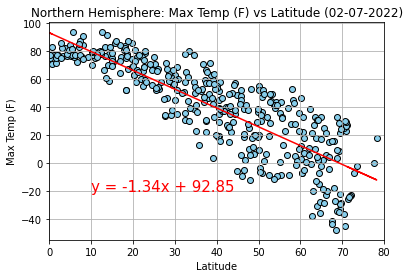

analysis


In [14]:
# Northern Hemisphere - Temperature (F) vs. Latitude

#Define plot specific information
hemisphere = "Northern"
xlabel = "Latitude"
ylabel = "Max Temp (F)"
savename = "N_MaxTvsLat"
annoloc = (10,-20)   #annotation location for the linear regression equation

#Call on the user-defined linreg function
linreg(hemisphere, xlabel, ylabel, annoloc, savename, date)

print("analysis")

The r-value is 0.5235


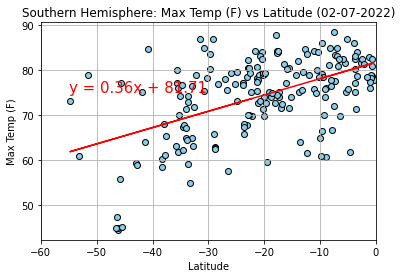

In [15]:
#Southern Hemisphere - Temperature (F) vs. Latitude

#Define plot specific information
hemisphere = "Southern"
xlabel = "Latitude"
ylabel = "Max Temp (F)"
savename = "S_MaxTvsLat"
annoloc = (-55,75)   #annotation location for the linear regression equation

linreg(hemisphere, xlabel, ylabel, annoloc, savename, date)

The r-value is 0.4552


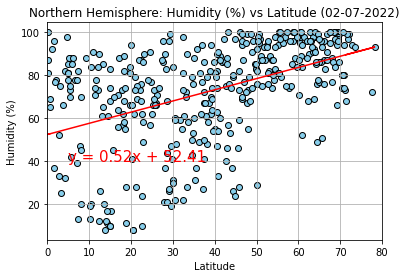

In [16]:
#Northern Hemisphere - Humidity (%) vs. Latitude

#Define plot specific information
hemisphere = "Northern"
xlabel = "Latitude"
ylabel = "Humidity (%)"
savename = "N_HumVsLat"
annoloc = (5,40)   #annotation location for the linear regression equation

linreg(hemisphere, xlabel, ylabel, annoloc, savename, date)

The r-value is 0.2061


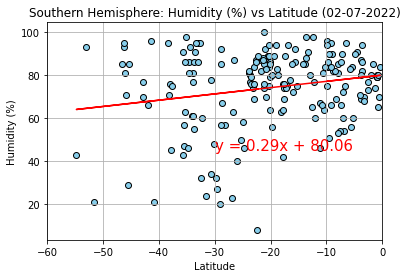

In [17]:
#Southern Hemisphere - Humidity (%) vs. Latitude

#Define plot specific information
hemisphere = "Southern"
xlabel = "Latitude"
ylabel = "Humidity (%)"
savename = "S_HumVsLat"
annoloc = (-30,45)   #annotation location for the linear regression equation

linreg(hemisphere, xlabel, ylabel, annoloc, savename, date)

The r-value is 0.2032


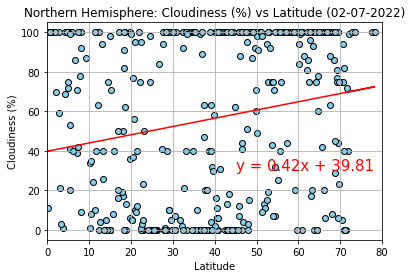

In [18]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude

#Define plot specific information
hemisphere = "Northern"
xlabel = "Latitude"
ylabel = "Cloudiness (%)"
savename = "N_CloudVsLat"
annoloc = (45,30)   #annotation location for the linear regression equation

linreg(hemisphere, xlabel, ylabel, annoloc, savename, date)

The r-value is 0.3705


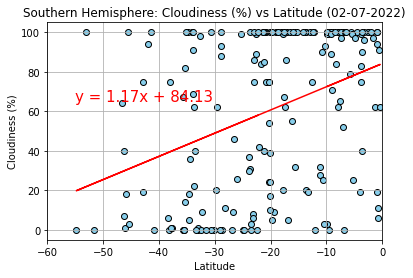

In [19]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude

#Define plot specific information
hemisphere = "Southern"
xlabel = "Latitude"
ylabel = "Cloudiness (%)"
savename = "S_CloudVsLat"
annoloc = (-55,65)   #annotation location for the linear regression equation

linreg(hemisphere, xlabel, ylabel, annoloc, savename, date)

The r-value is 0.1379


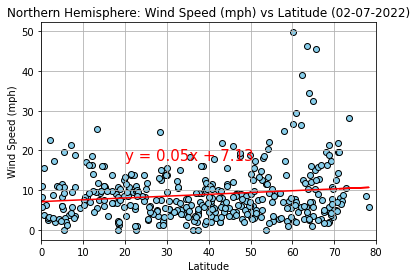

In [20]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude

#Define plot specific information
hemisphere = "Northern"
xlabel = "Latitude"
ylabel = "Wind Speed (mph)"
savename = "N_WSpdVsLat"
annoloc = (20,17.5)   #annotation location for the linear regression equation

linreg(hemisphere, xlabel, ylabel, annoloc, savename, date)

The r-value is -0.0833


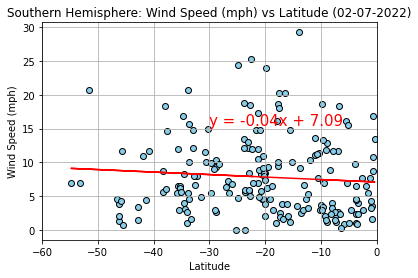

In [21]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude

#Define plot specific information
hemisphere = "Southern"
xlabel = "Latitude"
ylabel = "Wind Speed (mph)"
savename = "S_WSpdVsLat"
annoloc = (-30, 15.5)   #annotation location for the linear regression equation

linreg(hemisphere, xlabel, ylabel, annoloc, savename, date)